# Abundance Plots

In [1]:
import numpy
import mgkit.plots
import mgkit.plots.abund
import seaborn as sns
import pandas as pd

In [2]:
n = 10
p = 0.50
size = 20

In [3]:
data = pd.DataFrame({
    'S1': numpy.random.negative_binomial(n, p, size), 
    'S2': numpy.random.negative_binomial(n, p + 0.1, size),
    'S3': numpy.random.negative_binomial(n, p - 0.1, size),
})

## Triangle Plot

### Grid

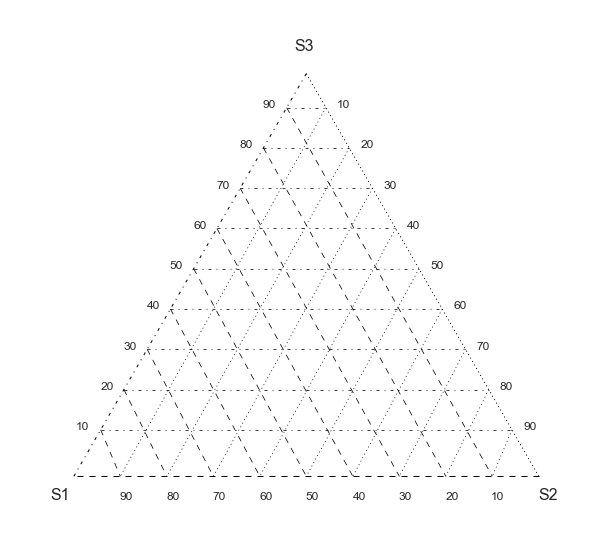

In [4]:
# First we need to draw the triangle grid
# aspect should be equal to ensure that the triangle sides have the same length
fig, ax = mgkit.plots.get_single_figure(figsize=(10, 10), aspect='equal')
# the labels passed are first drawn from bottom-left, then bottom-right and finally top
mgkit.plots.abund.draw_triangle_grid(ax, labels=data.columns)

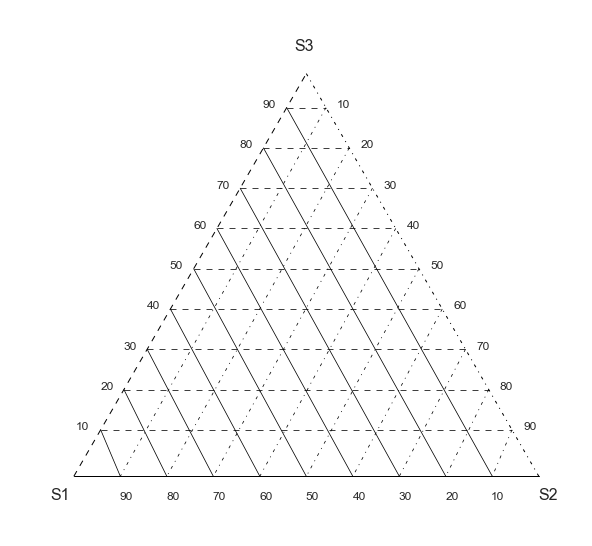

In [5]:
fig, ax = mgkit.plots.get_single_figure(figsize=(10, 10), aspect='equal')
# the style can be customised by passing the appropriate matplotlib line markers with the styles parameter
mgkit.plots.abund.draw_triangle_grid(ax, labels=data.columns, styles=['--', '-.', '-'])

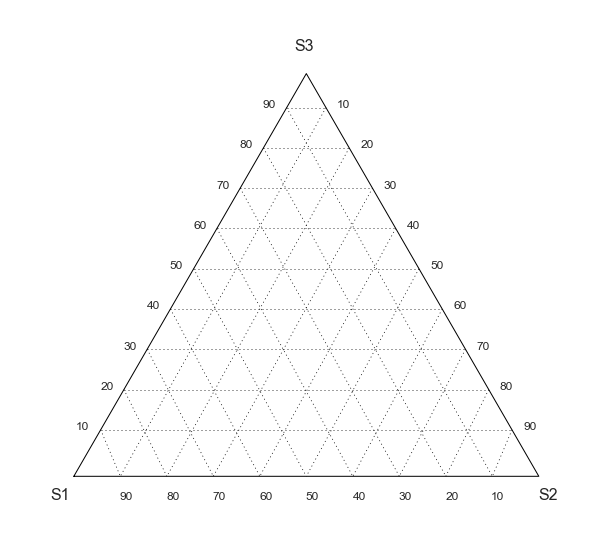

In [6]:
fig, ax = mgkit.plots.get_single_figure(figsize=(10, 10), aspect='equal')
# The axis can be set to solid lines and the internals to dotted by passing None as styles value
mgkit.plots.abund.draw_triangle_grid(ax, labels=data.columns, styles=None)

### Plot

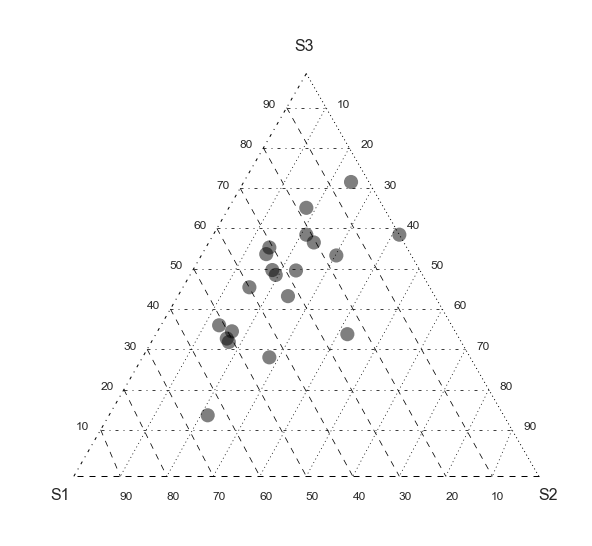

In [7]:
fig, ax = mgkit.plots.get_single_figure(figsize=(10, 10), aspect='equal')
mgkit.plots.abund.draw_triangle_grid(ax, labels=data.columns)
# this function accept matrices with either two or three columns
mgkit.plots.abund.draw_circles(ax, data)

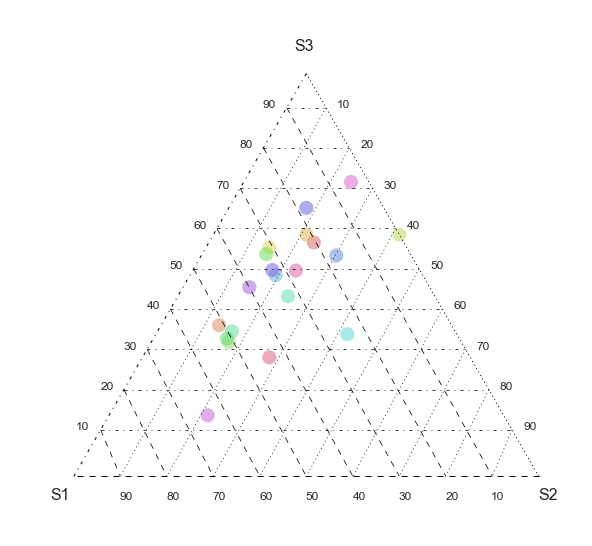

In [8]:
fig, ax = mgkit.plots.get_single_figure(figsize=(10, 10), aspect='equal')
mgkit.plots.abund.draw_triangle_grid(ax, labels=data.columns)
# col_func is any function that accept a value (an element of data.index) and returns a valid matplotlib color for it
col_func = lambda x: sns.color_palette('hls', len(data))[x]
mgkit.plots.abund.draw_circles(ax, data, col_func=col_func)

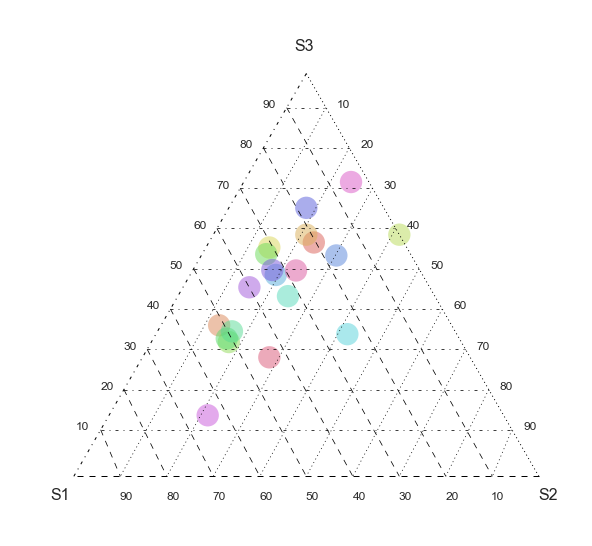

In [9]:
fig, ax = mgkit.plots.get_single_figure(figsize=(10, 10), aspect='equal')
mgkit.plots.abund.draw_triangle_grid(ax, labels=data.columns)
# csize is the base size for the circle
mgkit.plots.abund.draw_circles(ax, data, col_func=col_func, csize=500)

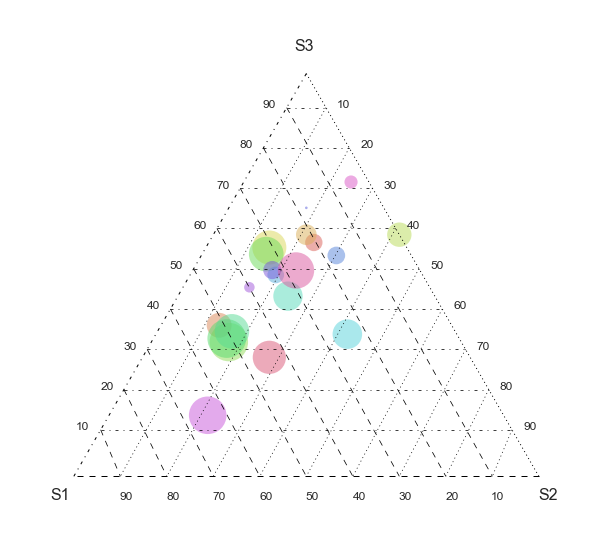

In [10]:
fig, ax = mgkit.plots.get_single_figure(figsize=(10, 10), aspect='equal')
mgkit.plots.abund.draw_triangle_grid(ax, labels=data.columns)
# the sizescale parameter allows to specify a size factor for each row that is multiplied to the csize parameter
sizescale = pd.Series(numpy.random.random(20) * 3)
mgkit.plots.abund.draw_circles(
    ax, 
    data, 
    col_func=lambda x: sns.color_palette('hls', len(data))[x], 
    csize=500, 
    sizescale=sizescale
)

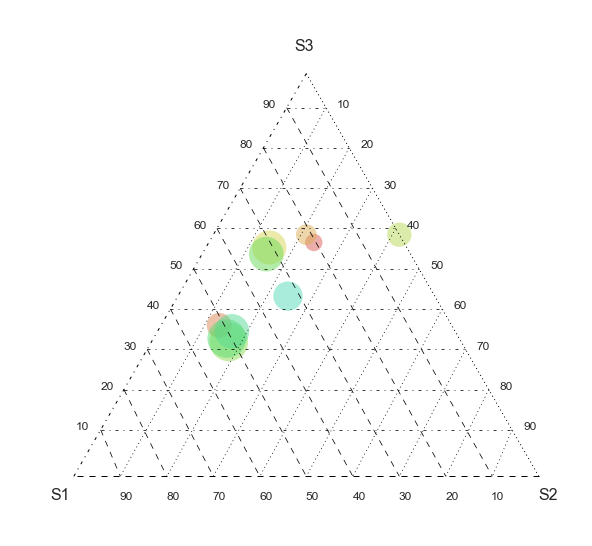

In [11]:
fig, ax = mgkit.plots.get_single_figure(figsize=(10, 10), aspect='equal')
mgkit.plots.abund.draw_triangle_grid(ax, labels=data.columns)
# the order parameter can be used to only plot only a subset of the point
mgkit.plots.abund.draw_circles(
    ax, 
    data, 
    col_func=col_func, 
    csize=500, 
    sizescale=sizescale,
    order=data.index[:10]
)

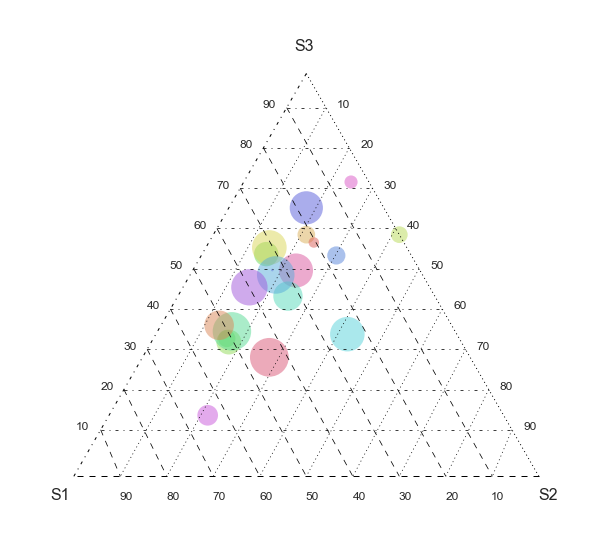

In [12]:
fig, ax = mgkit.plots.get_single_figure(figsize=(10, 10), aspect='equal')
mgkit.plots.abund.draw_triangle_grid(ax, labels=data.columns)
# or also to make sure bigger circles are drawn first, below smaller ones
mgkit.plots.abund.draw_circles(
    ax, 
    data, 
    col_func=col_func, 
    csize=500, 
    sizescale=sizescale,
    order=sizescale.sort(ascending=False, inplace=False).index
)

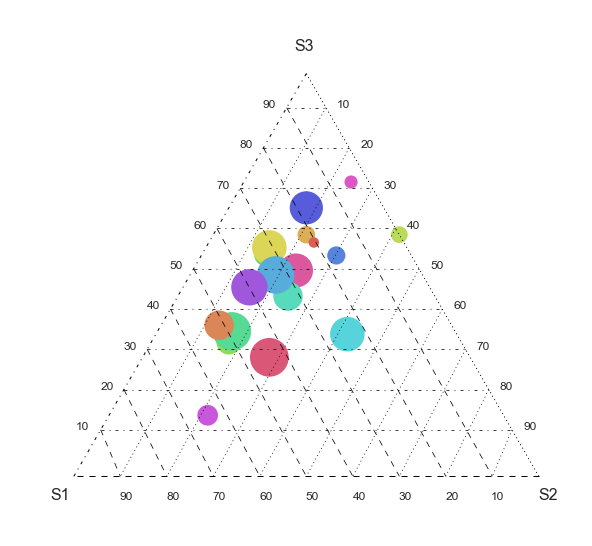

In [13]:
fig, ax = mgkit.plots.get_single_figure(figsize=(10, 10), aspect='equal')
mgkit.plots.abund.draw_triangle_grid(ax, labels=data.columns)
# trasparency of circles can be adjusted with the alpha parameter (between 0 and 1)
mgkit.plots.abund.draw_circles(
    ax, 
    data, 
    col_func=col_func, 
    csize=500, 
    sizescale=sizescale,
    order=sizescale.sort(ascending=False, inplace=False).index,
    alpha=1
)

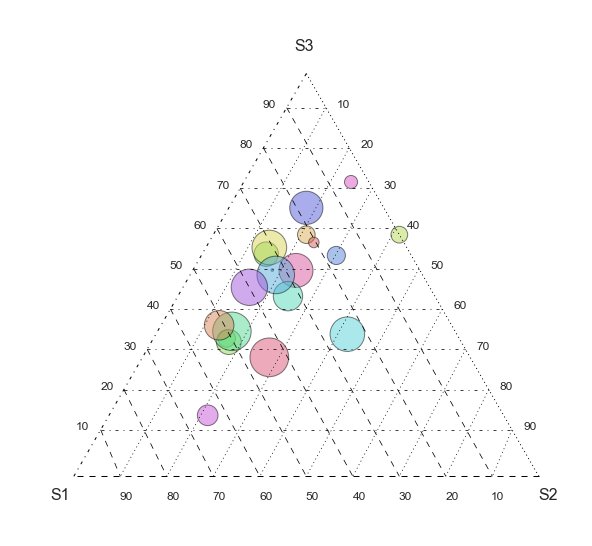

In [14]:
fig, ax = mgkit.plots.get_single_figure(figsize=(10, 10), aspect='equal')
mgkit.plots.abund.draw_triangle_grid(ax, labels=data.columns)
# if lines are required around the circles, linewidths and edgecolor can be used to customise them
mgkit.plots.abund.draw_circles(
    ax, 
    data, 
    col_func=col_func, 
    csize=500, 
    sizescale=sizescale,
    order=sizescale.sort(ascending=False, inplace=False).index,
    linewidths=1,
    edgecolor='k'
)

## Abundance Plot with 2 Samples

### Grid

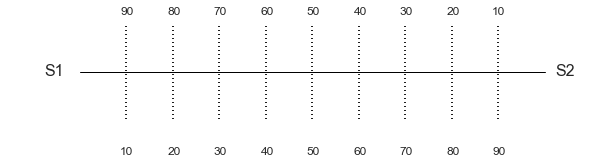

In [15]:
# First we need to draw the 1D grid
# aspect should be set to make sure the correct aspect ratio is drawn
fig, ax = mgkit.plots.get_single_figure(figsize=(10, 3), aspect=0.1)
# the labels passed are drawn from left to right
mgkit.plots.abund.draw_1d_grid(ax, labels=data.columns[:2])

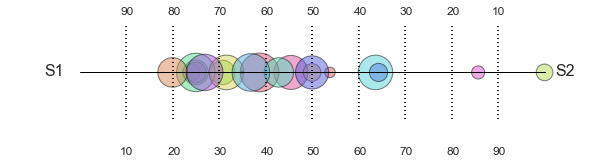

In [16]:
fig, ax = mgkit.plots.get_single_figure(figsize=(10, 3), aspect=0.1)
mgkit.plots.abund.draw_1d_grid(ax, labels=data.columns[:2])
mgkit.plots.abund.draw_circles(
    ax, 
    data.icol([0,1]), 
    col_func=col_func, 
    csize=500, 
    sizescale=sizescale,
    order=sizescale.sort(ascending=False, inplace=False).index,
    linewidths=1,
    edgecolor='k'
)